In [1]:
"""
To compre the excitatory, inhibitory classifier 
against 

- Stelios data
- Allen and Princeton


"""

'\nTo compre the excitatory, inhibitory classifier \nagainst \n\n- Stelios data\n- Allen and Princeton\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-03-03 00:56:29,440 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-03 00:56:29,442 - settings - Setting database.user to celiib
INFO - 2021-03-03 00:56:29,443 - settings - Setting database.password to newceliipass
INFO - 2021-03-03 00:56:29,455 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-03-03 00:56:29,456 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-03 00:56:29,470 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-03-03 00:56:29,809 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-03 00:56:29,813 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-03 00:56:29,814 - settings - Setting database.user to celiib
INFO - 2021-03-03 00:56:29,814 - settings - Setting database.password to newceliipass
INFO - 2021-03-03 00:56:29,815 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-03 00:56:29,816 - settings - Setting database.user to celiib
INFO - 2021-03-03 00:56:29,816 - settings - Setting database.password to newceliipass
INFO - 2021-03-03 00:56:29,819 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-03 00:56:30,175 - settings - Setting enable_python_native_blobs to True


In [4]:
import proofreading_utils as pru
import classification_utils as clu
import neuron_visualizations as nviz

In [160]:
import statistics_visualizations as s_viz
import statistics_utils as stu

In [5]:
minnie,schema = du.configure_minnie_vm()

INFO - 2021-03-03 00:56:30,336 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-03 00:56:30,337 - settings - Setting database.user to celiib
INFO - 2021-03-03 00:56:30,338 - settings - Setting database.password to newceliipass
INFO - 2021-03-03 00:56:30,339 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-03 00:56:30,734 - settings - Setting enable_python_native_blobs to True


# Looking at the Manually Annotated Data

In [161]:
dj.config["display.limit"] = 50
prediction_and_label_table = du.proofreading_neurons_table() * du.get_exc_inh_classified_table()

new_table = prediction_and_label_table.proj("cell_type_predicted","cell_type","spine_category")

(segment_id_list,
 split_index_list,
nucleus_id_list, 
 cell_type_predicted_list, 
 spine_category_list, 
 cell_type_list) = new_table.fetch("segment_id","split_index",
                                   "nucleus_id",
                                  "cell_type_predicted",
                                 "spine_category",
                                 "cell_type")

INFO - 2021-03-03 04:56:49,121 - settings - Setting display.limit to 50


In [162]:
conflicting_idx = np.where(cell_type_predicted_list != cell_type_list)[0]
spine_category_list[conflicting_idx]


array(['sparsely_spined', 'sparsely_spined', 'sparsely_spined',
       'sparsely_spined', 'densely_spined', 'sparsely_spined',
       'sparsely_spined', 'densely_spined', 'sparsely_spined',
       'sparsely_spined', 'sparsely_spined', 'sparsely_spined',
       'sparsely_spined', 'sparsely_spined', 'sparsely_spined',
       'sparsely_spined', 'sparsely_spined', 'sparsely_spined',
       'sparsely_spined', 'sparsely_spined', 'sparsely_spined',
       'sparsely_spined', 'densely_spined'], dtype=object)

In [9]:
check_index = 22
confl_idx = conflicting_idx[check_index]
segment_id = segment_id_list[confl_idx]
split_index = split_index_list[confl_idx]
nucleus_id = nucleus_id_list[confl_idx]
spine_cat = spine_category_list[confl_idx]
stelios_label = cell_type_list[confl_idx]
auto_label = cell_type_predicted_list[confl_idx]

print(f"{segment_id} split {split_index} nucleus {nucleus_id}")
print(f"Spine Category: {spine_cat}")
print(f"[A]: {auto_label} vs. [M]: {stelios_label}")

du.plot_proofread_neuron(segment_id,
                        split_index,
                        plot_errored_faces=True,
                         plot_nuclei = True,
                         plot_dendrite_skeleton=False,
                        )

864691136903027122 split 0 nucleus 306503
Spine Category: densely_spined
[A]: excitatory vs. [M]: inhibitory
No axon to plot


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [163]:
#manual mistakes
stelios_said_inhibitory_but_excitatory = [864691135523678660,
                                          864691135497663251,
                                          864691135500208836,
                                         864691135581209284]

# My mistakes
classified_excitatory_but_inhibitory = [864691135269732773,
                                        864691135348317426,
                                       864691135354903503,
                                       864691135510810610,
                                       864691135567721964,
                                       864691135730102201,
                                       864691135780829520,
                                       864691135855579950,
                                       864691135888524169,
                                       864691135946646369,
                                       864691136023751737,
                                       864691136040991574,
                                       864691136296716571,
                                       864691136547548322,
                                       864691136618477197,
                                       864691136723335165,
                                       864691136768713582]

classified_inhibitory_but_excitatory = [864691135461969906]

# Validation Analysis for the E/I Classificaiton

In [164]:
import pandas as pd

In [165]:
auto_label, manual_label, spine_category,segment_ids = new_table.fetch("cell_type_predicted",
                                                           "cell_type",
                                                           "spine_category",
                                                          "segment_id")

In [167]:
df = pd.DataFrame()
df["manual_label"] = manual_label
df["auto_label"] = auto_label
df["spine_category"] =spine_category
df["segment_id"] =segment_ids
df_stelios = df[~df["segment_id"].isin(stelios_said_inhibitory_but_excitatory)]
df_stelios

,manual_label,auto_label,spine_category,segment_id
0,inhibitory,inhibitory,sparsely_spined,864691134884747002
1,inhibitory,inhibitory,sparsely_spined,864691134884749050
2,inhibitory,inhibitory,sparsely_spined,864691134884755962
3,excitatory,excitatory,densely_spined,864691134964453919
4,excitatory,excitatory,sparsely_spined,864691135012380662
...,...,...,...,...
249,excitatory,excitatory,densely_spined,864691136973699612
250,excitatory,excitatory,densely_spined,864691136989967765
251,excitatory,excitatory,densely_spined,864691136989999765
252,excitatory,excitatory,densely_spined,864691137053645430


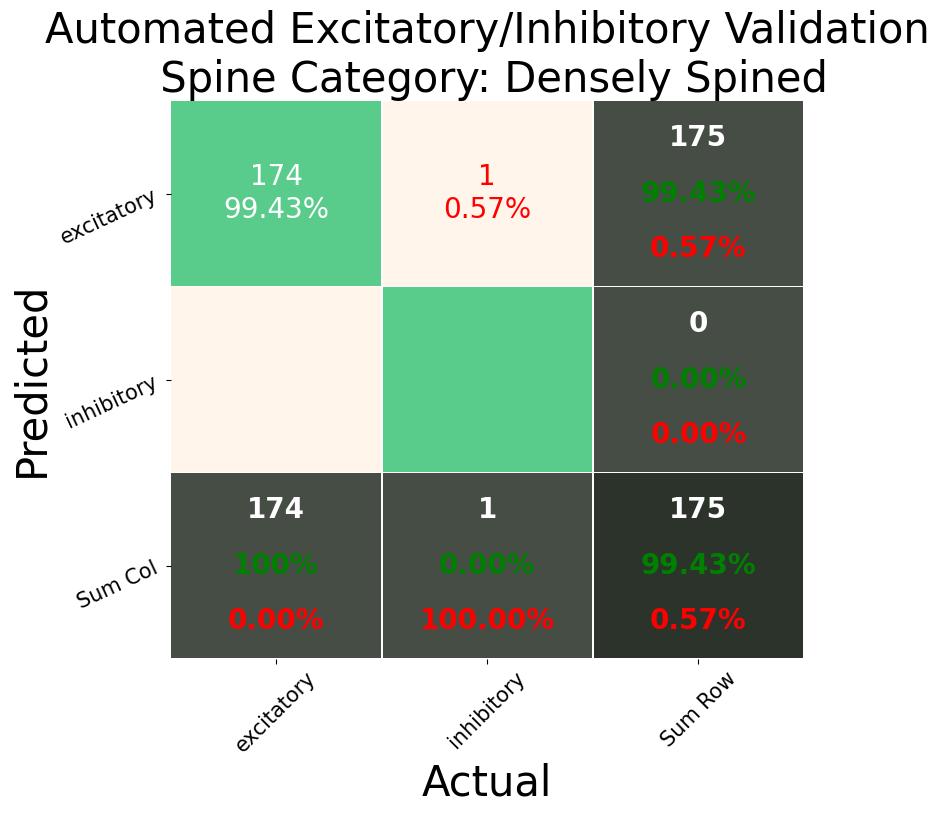

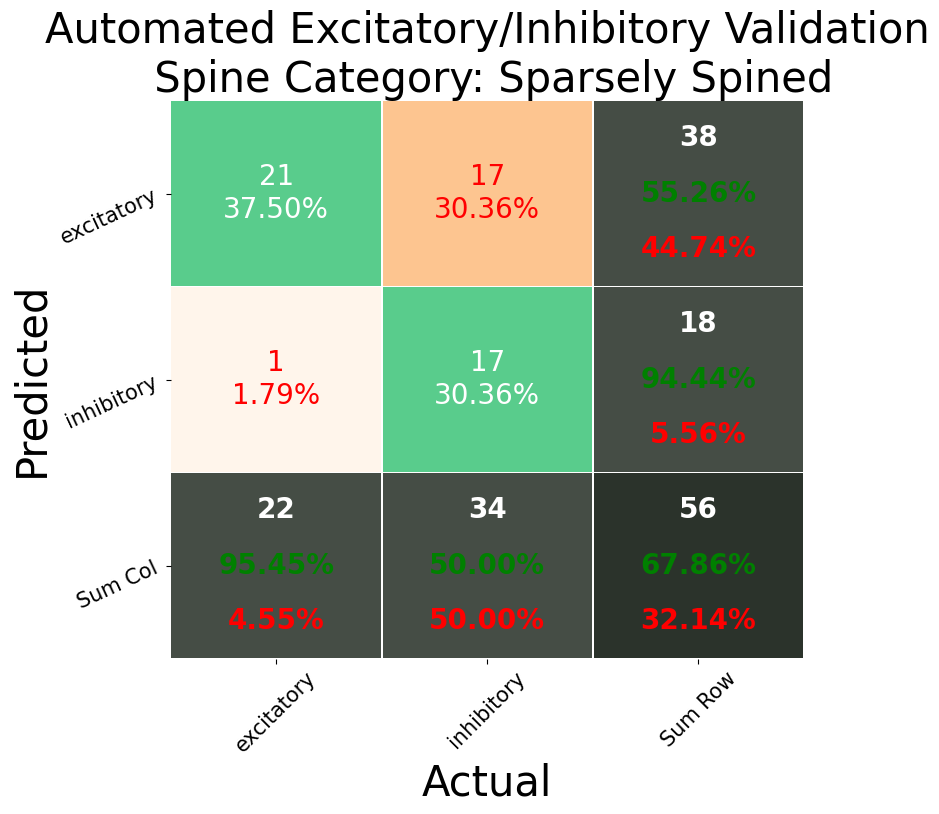

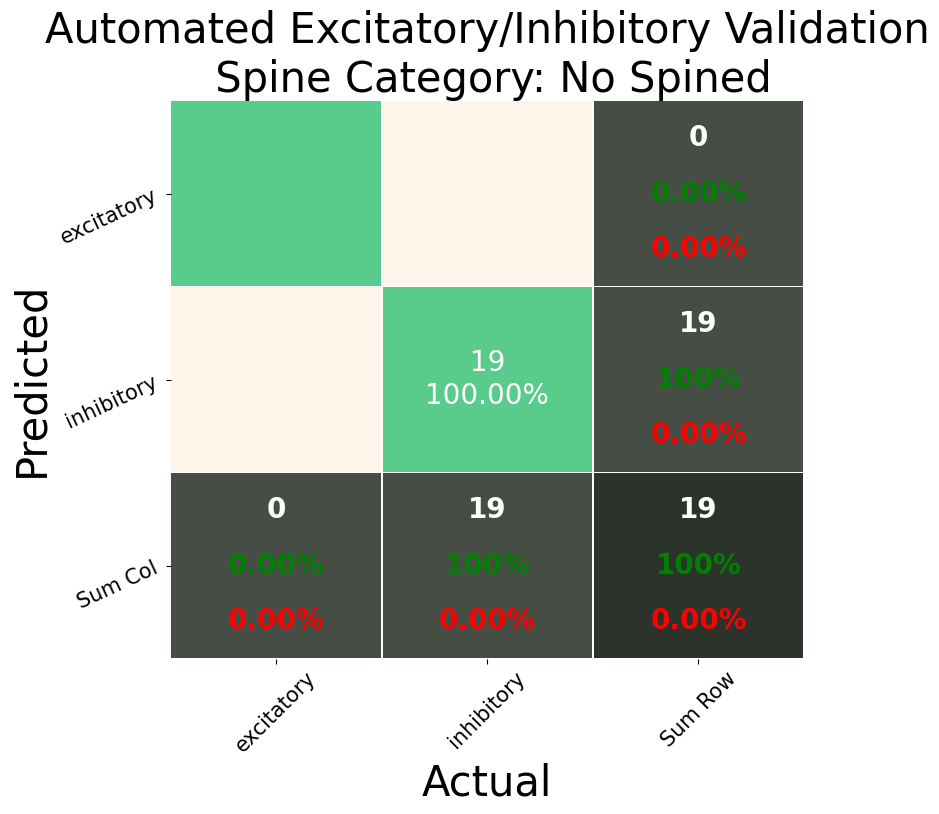

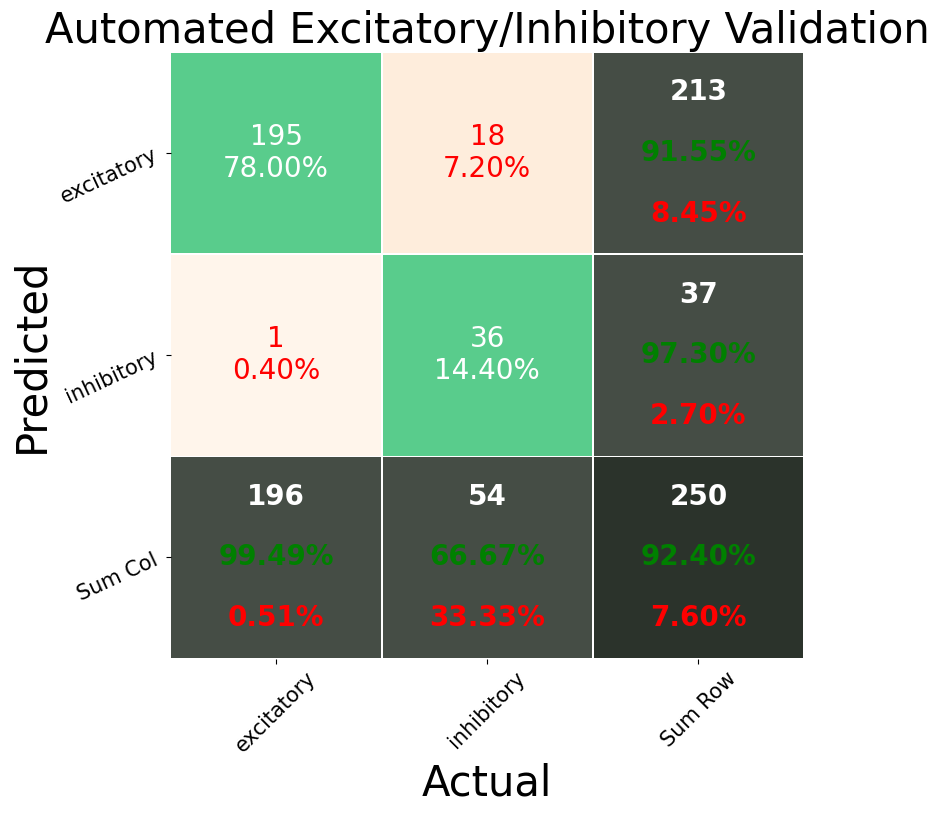

In [172]:
"""
Purpose: To Create graphs that show the E/I classification efficiency

Input: Dataframe with the spine category, auto-classification, manual classification

Output: 
1) A Precision, Recall and F1 for all the spine categories and the total
2) TP/FP/FN... square for all of the 3 spine categories and both

Pseudocode: 
1) Create a dataframe that has the TP, TN..... category as well
2) For each of the 4 groups compute the confusion matricies:
a. Restrict the table to only that certain group
b. Compute the confusion matrix
3) For the whole dataframe compute the recall, percision, F1
"""

positive_value="excitatory"
negative_value="inhibitory"

df_filtered= df_stelios

possible_positive_values = ["excitatory","inhibitory"]

spine_categories = ["densely_spined",
                   "sparsely_spined",
                   "no_spined",
                   "all"]

y_true_label="manual_label"
y_pred_label = "auto_label"

spine_categories_scores_dict = {k:[] for k in possible_positive_values}
spine_categories_scores_average = []

base_title = f"Automated Excitatory/Inhibitory Validation"
for sp_c in spine_categories:
    if sp_c != "all":
        df_spine = df_filtered[df_filtered["spine_category"] == sp_c]
        cm_title = base_title + f"\n Spine Category: {sp_c.replace('_',' ').title()}"
    else:
        df_spine = df_filtered
        cm_title = base_title
        
    true_labels = df_spine[y_true_label].to_numpy()
    pred_labels = df_spine[y_pred_label].to_numpy()
    labels = ["excitatory","inhibitory"]
    s_viz.plot_pretty_confusion_matrix(y_true=true_labels,
                                 y_pred=pred_labels,
                                 labels=labels,
                                 title=cm_title,
                                        )
    
    for j,p_value in enumerate(possible_positive_values):
        spine_categories_scores_dict[p_value].append(stu.true_and_pred_labels_to_precision_recall_f1score(true_labels,
                                                                                                    pred_labels,
                                                                                                    labels=labels,
                                                                                                    positive_value=p_value))
    spine_categories_scores_average.append(stu.true_and_pred_labels_to_precision_recall_f1score(true_labels,
                                                                                                    pred_labels,
                                                                                                    labels=labels,
                                                                                                    positive_value=None,
                                                                                                    average='micro'
                                                                                                
                                                                                               ))

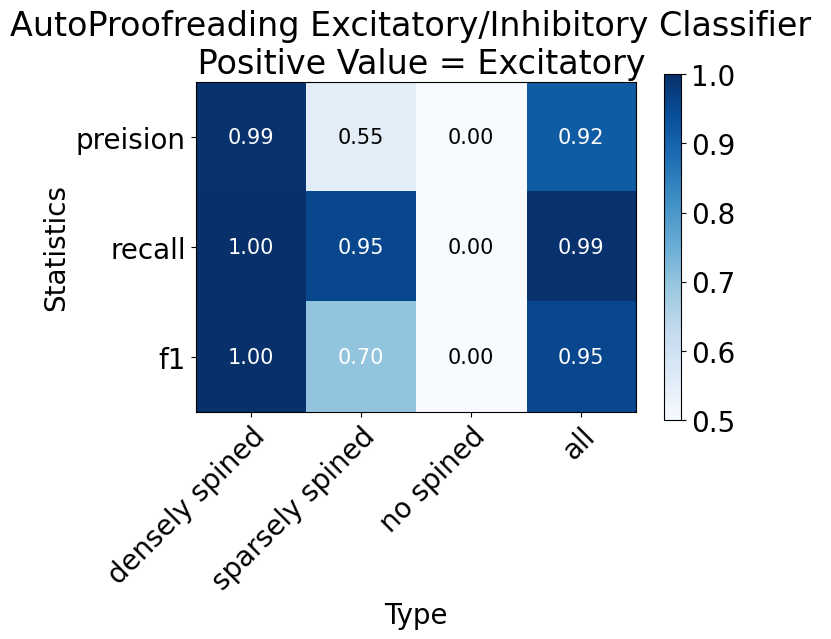

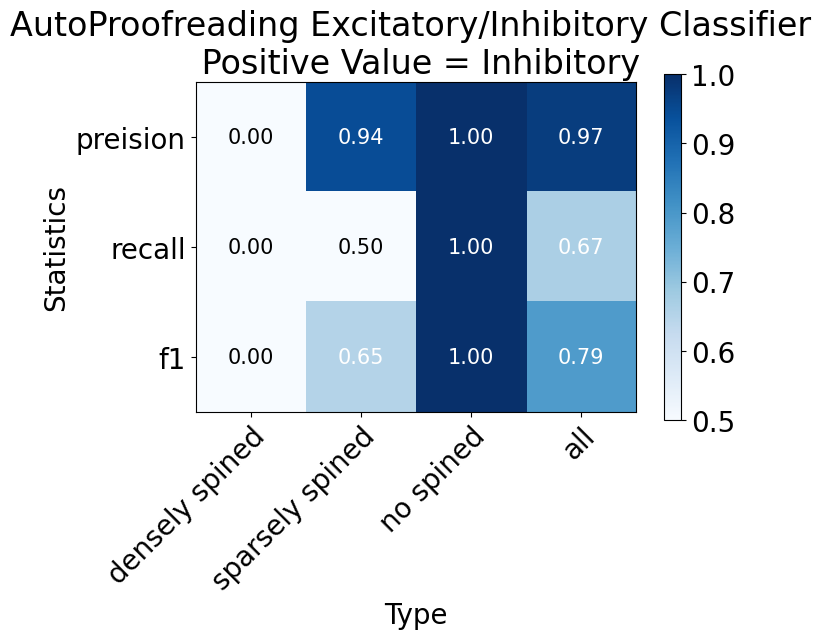

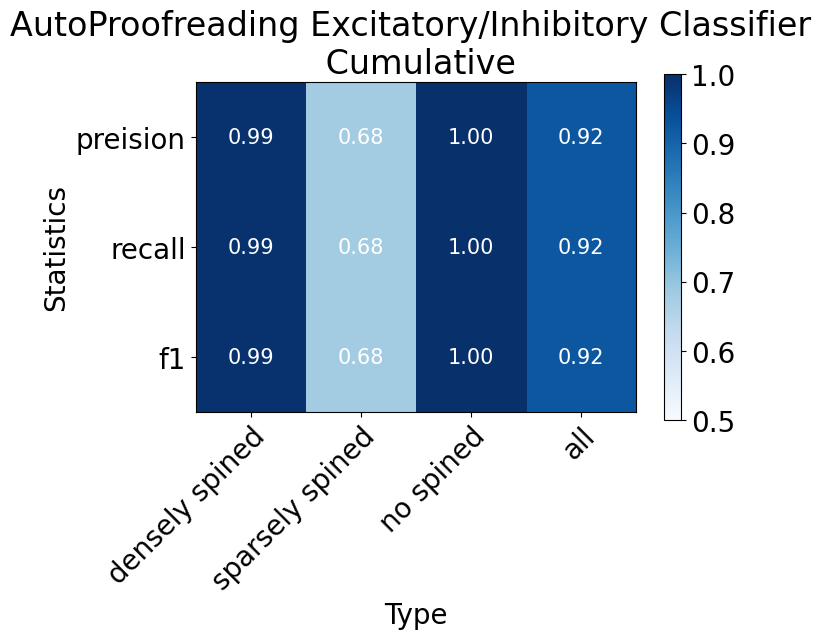

In [173]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 20}
    

for p_value,spine_categories_scores in spine_categories_scores_dict.items():
    matplotlib.rc('font', **font)
    spine_categories_scores_trans = np.array(spine_categories_scores)
    spine_categories_scores_trans

    s_viz.plot_heatmap(
    input_row_names = spine_categories,
    input_col_names = ["preision","recall","f1"],
    data=spine_categories_scores_trans,
    title=f"AutoProofreading Excitatory/Inhibitory Classifier \n Positive Value = {p_value.title()}")
    
    plt.show()

#Also want to do the average
matplotlib.rc('font', **font)

spine_categories_scores_trans = np.array(spine_categories_scores_average)
spine_categories_scores_trans

s_viz.plot_heatmap(
input_row_names = spine_categories,
input_col_names = ["preision","recall","f1"],
data=spine_categories_scores_trans,
title=f"AutoProofreading Excitatory/Inhibitory Classifier \n Cumulative")

# Doing the Allen annotation

In [148]:
from annotationframeworkclient import FrameworkClient
client = FrameworkClient('minnie65_phase3_v1')
cell_types = client.materialize.query_table('allen_v1_column_types_v2', filter_out_dict={'pt_root_id': [0]})
cell_types_table = cell_types.query('cell_type != "Unsure" ')
np.unique(cell_types["cell_type"].to_numpy())

array(['23P', '4P', '5P_IT', '5P_NP', '5P_PT', '6CT', '6IT', '6P', 'BC',
       'BPC', 'MC', 'NGC', 'Unsure'], dtype=object)

In [149]:
np.setdiff1d(np.unique(cell_types["cell_type"].to_numpy()),list(cell_type_to_e_i_dict.keys()))

array(['Unsure'], dtype=object)

In [150]:
segment_ids_allen,cell_types_allen = cell_types_table[["pt_root_id","cell_type"]].to_numpy().T
seg_to_allen_cell_type_dict = {k:v for k,v in zip(segment_ids_allen,cell_types_allen)}
seg_to_allen_cell_type_dict

{864691135355114447: '23P',
 864691135379935474: 'BC',
 864691136443927427: 'BPC',
 864691135446606420: '23P',
 864691135472122930: '23P',
 864691136672628359: '23P',
 864691135776533600: '23P',
 864691136418711703: 'NGC',
 864691135925632526: 'BC',
 864691135445586322: '23P',
 864691136286555587: '23P',
 864691135683980471: '23P',
 864691135155553636: '23P',
 864691136443917699: 'BPC',
 864691135065074756: '5P_IT',
 864691135274187493: '23P',
 864691135354870991: 'MC',
 864691135715243546: '23P',
 864691135994596522: '23P',
 864691135462701630: '23P',
 864691136951707103: 'NGC',
 864691136601709009: '23P',
 864691135065074500: '23P',
 864691136699107694: '5P_IT',
 864691135462380189: '23P',
 864691135445620626: '4P',
 864691135065126724: 'BC',
 864691135099992352: '5P_IT',
 864691135876117331: 'NGC',
 864691135488786884: '5P_IT',
 864691135445680274: '5P_IT',
 864691135564753495: '23P',
 864691135567840492: '5P_IT',
 864691136008406700: '4P',
 864691135502183349: '4P',
 86469113605654

In [151]:
feature_names = ["segment_id", "spine_category", "cell_type_predicted"]
total_data = (minnie.AutoProofreadNeurons3() & [dict(segment_id=k) for k in cell_types_table["pt_root_id"].to_numpy()]).fetch(*feature_names)
prediction_table = pd.DataFrame(np.array(total_data).T)
prediction_table.columns = feature_names
prediction_table["allen_cell_type"] = [seg_to_allen_cell_type_dict[k] for k in prediction_table["segment_id"]]
prediction_table

,segment_id,spine_category,cell_type_predicted,allen_cell_type
0,864691134884790778,densely_spined,excitatory,4P
1,864691134917385738,densely_spined,excitatory,23P
2,864691134917419530,densely_spined,excitatory,5P_IT
3,864691134917454858,densely_spined,excitatory,23P
4,864691134917476618,sparsely_spined,excitatory,BC
...,...,...,...,...
1066,864691136989967765,densely_spined,excitatory,5P_PT
1067,864691136990010517,densely_spined,excitatory,4P
1068,864691137019556462,densely_spined,excitatory,4P
1069,864691137053638774,densely_spined,excitatory,6CT


In [152]:
# showing there is no overlap
np.intersect1d(df_filtered["segment_id"].to_numpy(),prediction_table["segment_id"].to_numpy())

array([864691134917476618, 864691134940086115, 864691135012368374,
       864691135012644086, 864691135058546331, 864691135065081156,
       864691135065094212, 864691135210074560, 864691135233230169,
       864691135269681317, 864691135274261733, 864691135303140007,
       864691135303292839, 864691135307192390, 864691135354870991,
       864691135367077881, 864691135393952757, 864691135394129397,
       864691135427203314, 864691135433422578, 864691135462195442,
       864691135467683724, 864691135490654183, 864691135497601299,
       864691135497762323, 864691135501945437, 864691135515926995,
       864691135517494410, 864691135571206437, 864691135571213764,
       864691135587354052, 864691135615868521, 864691135616008809,
       864691135657840514, 864691135684173751, 864691135697462549,
       864691135697492245, 864691135697502485, 864691135699372834,
       864691135754758610, 864691135758647630, 864691135771594235,
       864691135775926701, 864691135815624783, 864691135815637

In [153]:
# converting the list to cell type
i = "inhibitory"
e = "excitatory"
cell_type_to_e_i_dict = {
"BC":i,
"BPC":i,
"MC":i,
"NGC":i,
'23P':e,
'4P':e, 
'5P_IT':e,
'5P_NP':e,
'5P_PT':e,
'6CT':e,
'6IT':e,
'6P':e ,
}
cell_type_to_e_i_dict

{'BC': 'inhibitory',
 'BPC': 'inhibitory',
 'MC': 'inhibitory',
 'NGC': 'inhibitory',
 '23P': 'excitatory',
 '4P': 'excitatory',
 '5P_IT': 'excitatory',
 '5P_NP': 'excitatory',
 '5P_PT': 'excitatory',
 '6CT': 'excitatory',
 '6IT': 'excitatory',
 '6P': 'excitatory'}

In [154]:
prediction_table["cell_type"] = [cell_type_to_e_i_dict[k] for k in prediction_table["allen_cell_type"]]
prediction_table["cell_type"].to_numpy()

array(['excitatory', 'excitatory', 'excitatory', ..., 'excitatory',
       'excitatory', 'excitatory'], dtype=object)

# Running the Validation

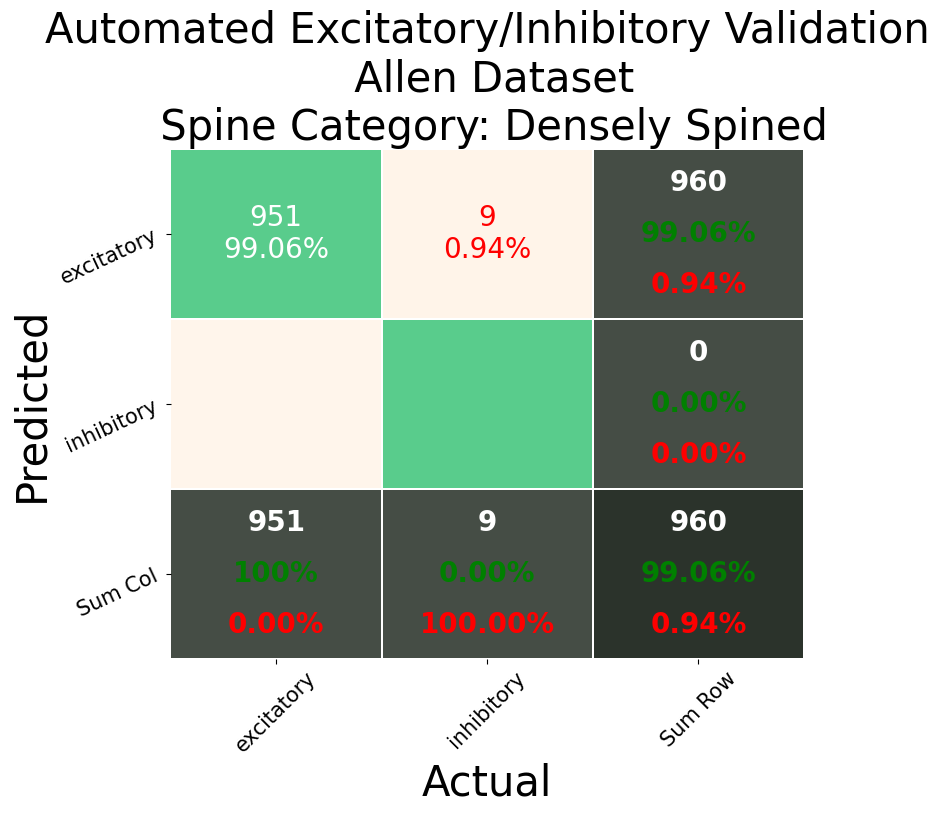

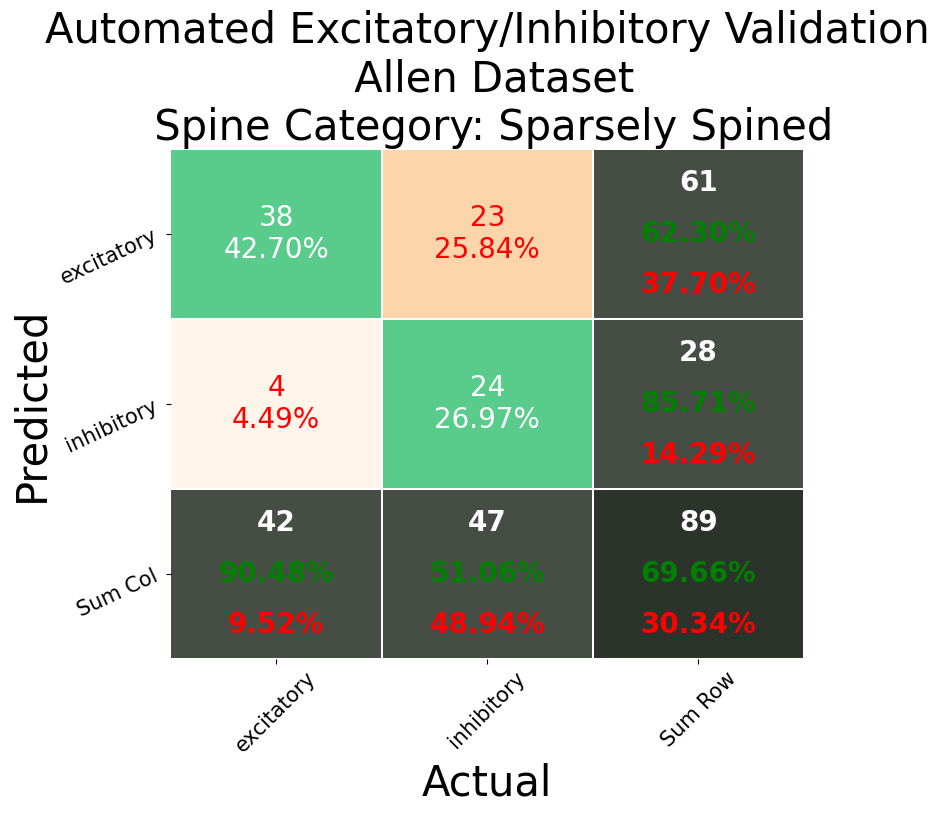

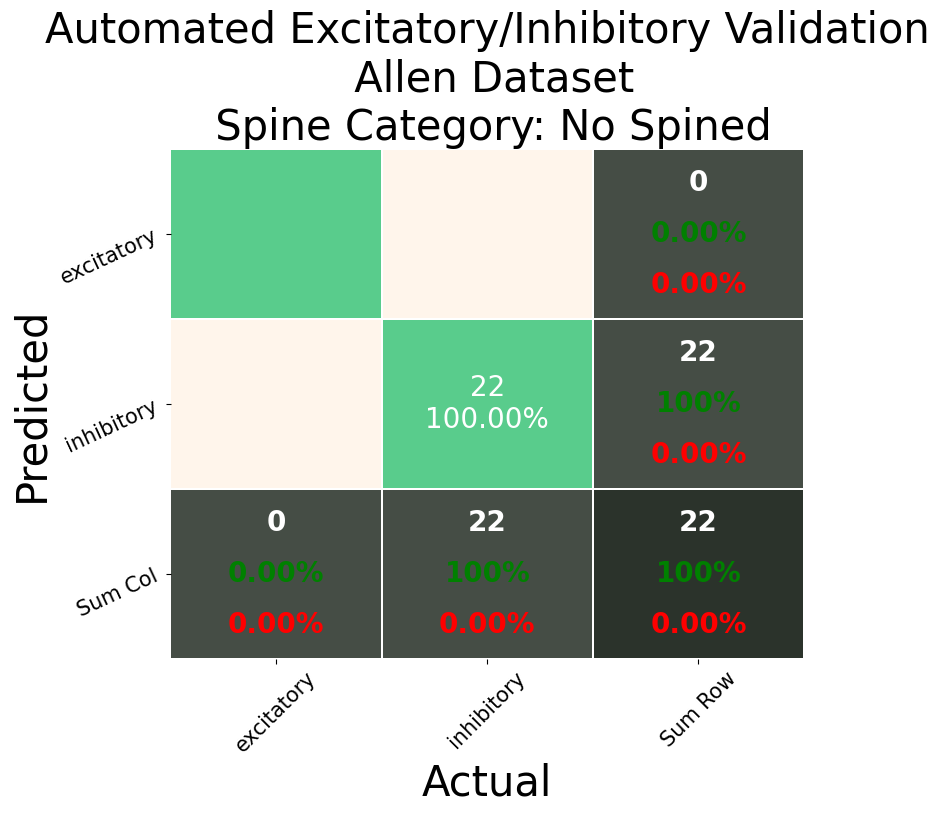

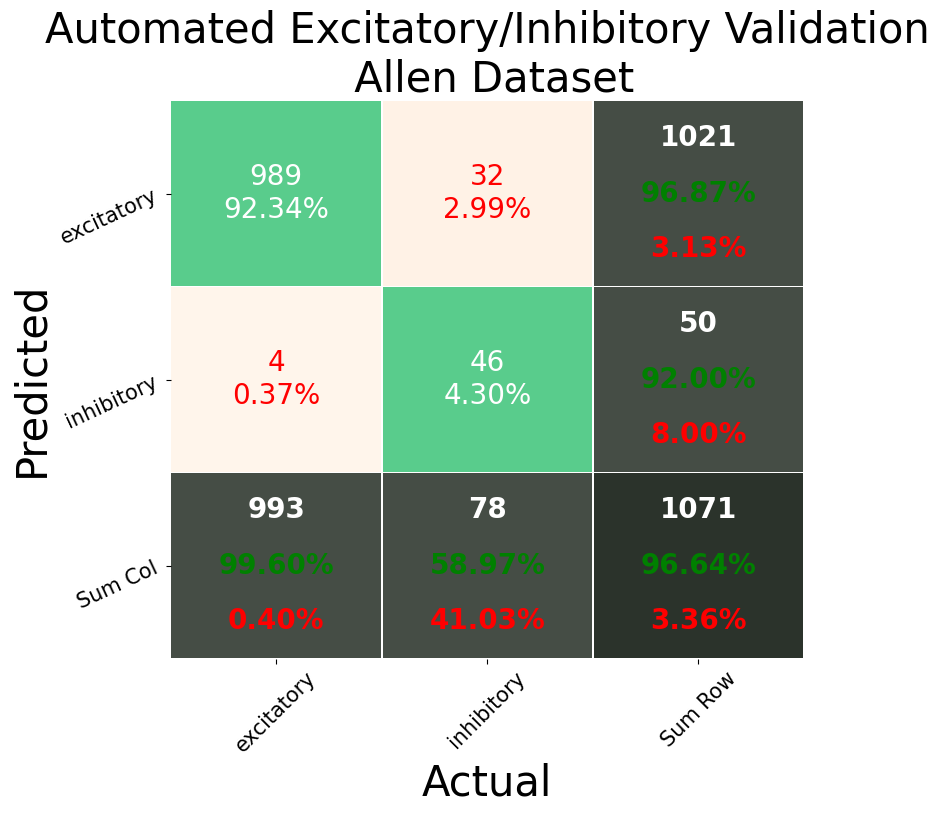

In [177]:
df_filtered = prediction_table

positive_value="excitatory"
negative_value="inhibitory"

possible_positive_values = ["excitatory","inhibitory"]

spine_categories = ["densely_spined",
                   "sparsely_spined",
                   "no_spined",
                   "all"]

y_true_label="cell_type"
y_pred_label = "cell_type_predicted"

spine_categories_scores_dict = {k:[] for k in possible_positive_values}
spine_categories_scores_average = []

base_title = f"Automated Excitatory/Inhibitory Validation\n Allen Dataset"
for sp_c in spine_categories:
    if sp_c != "all":
        df_spine = df_filtered[df_filtered["spine_category"] == sp_c]
        cm_title = base_title + f"\n Spine Category: {sp_c.replace('_',' ').title()}"
    else:
        df_spine = df_filtered
        cm_title = base_title
        
    true_labels = df_spine[y_true_label].to_numpy()
    pred_labels = df_spine[y_pred_label].to_numpy()
    labels = ["excitatory","inhibitory"]
    s_viz.plot_pretty_confusion_matrix(y_true=true_labels,
                                 y_pred=pred_labels,
                                 labels=labels,
                                 title=cm_title,
                                        )
    
    for j,p_value in enumerate(possible_positive_values):
        spine_categories_scores_dict[p_value].append(stu.true_and_pred_labels_to_precision_recall_f1score(true_labels,
                                                                                                    pred_labels,
                                                                                                    labels=labels,
                                                                                                    positive_value=p_value))
    spine_categories_scores_average.append(stu.true_and_pred_labels_to_precision_recall_f1score(true_labels,
                                                                                                    pred_labels,
                                                                                                    labels=labels,
                                                                                                    positive_value=None,
                                                                                                    average='micro'
                                                                                                
                                                                                               ))

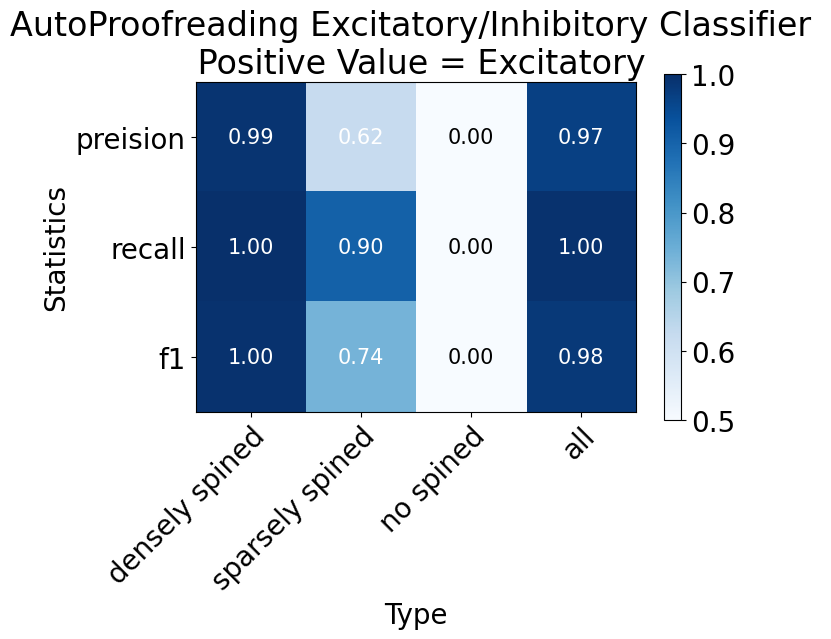

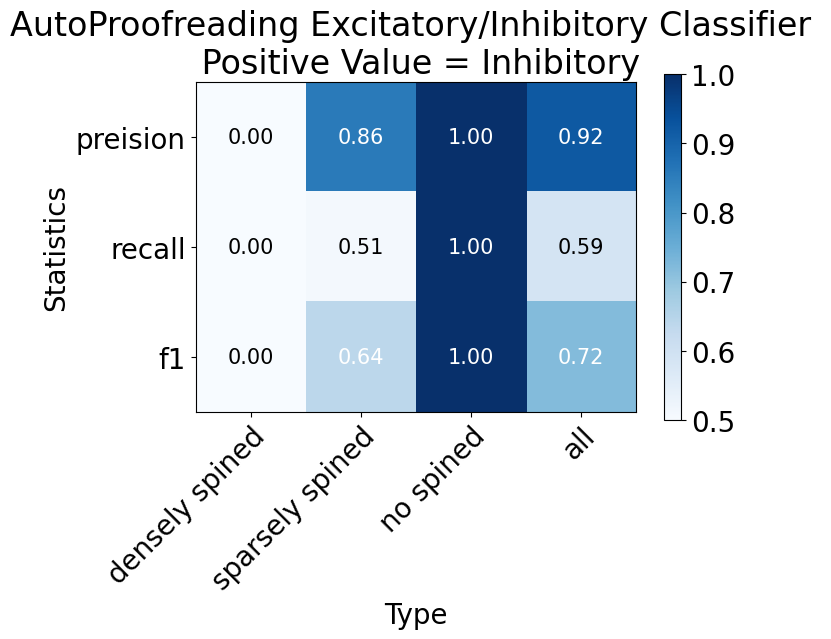

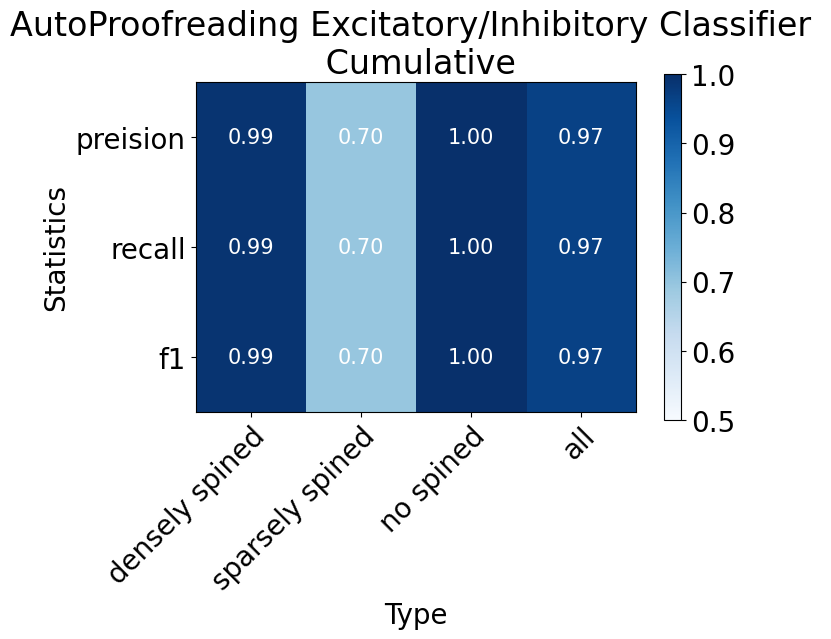

In [176]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 20}
    

for p_value,spine_categories_scores in spine_categories_scores_dict.items():
    matplotlib.rc('font', **font)
    spine_categories_scores_trans = np.array(spine_categories_scores)
    spine_categories_scores_trans

    s_viz.plot_heatmap(
    input_row_names = spine_categories,
    input_col_names = ["preision","recall","f1"],
    data=spine_categories_scores_trans,
    title=f"AutoProofreading Excitatory/Inhibitory Classifier \n Positive Value = {p_value.title()}")
    
    plt.show()

#Also want to do the average
matplotlib.rc('font', **font)

spine_categories_scores_trans = np.array(spine_categories_scores_average)
spine_categories_scores_trans

s_viz.plot_heatmap(
input_row_names = spine_categories,
input_col_names = ["preision","recall","f1"],
data=spine_categories_scores_trans,
title=f"AutoProofreading Excitatory/Inhibitory Classifier \n Cumulative")